In [1]:
import cv2
from matplotlib import pyplot as plt
import glob
import numpy as np
from math import floor
import glob

In [2]:
def imread(path):
    return cv2.imread(path)[:,:,::-1]

In [3]:
images_vows = [cv2.resize(imread(file), (28, 28))  for file in glob.glob('training_set/vowls/*.png')]
images_nouns = [cv2.resize(imread(file), (28, 28))  for file in glob.glob('training_set/nouns/*.png')]


images_vows = [~cv2.adaptiveThreshold(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),255,1,1,11,2)  for img in images_vows]
images_nouns = [~cv2.adaptiveThreshold(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),255,1,1,11,2)  for img in images_nouns]


In [4]:
labels = [1 for i in images_vows] + [0 for i in images_nouns]

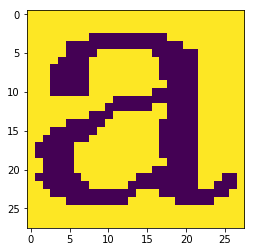

In [5]:
plt.imshow(images_vows[0])

In [6]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
from keras.constraints import maxnorm
from keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

C:\Users\iustin.petrisor\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
images = np.array(images_vows + images_nouns)
X_train = images.reshape(images.shape[0], 28, 28, 1)


In [9]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)
epochs = 30
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, labels, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=epochs)

# here's a more "manual" example
for e in range(epochs):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(X_train, labels, batch_size=2):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= len(X_train) / 32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

Epoch 1/30
1/0 [======================================] - 0s 242ms/step - loss: 0.6977 - accuracy: 0.5200
Epoch 2/30
1/0 [======================================] - 0s 35ms/step - loss: 0.5650 - accuracy: 0.7600
Epoch 3/30
1/0 [======================================] - 0s 66ms/step - loss: 0.5887 - accuracy: 0.7600
Epoch 4/30
1/0 [======================================] - 0s 119ms/step - loss: 0.5667 - accuracy: 0.7600
Epoch 5/30
1/0 [======================================] - 0s 83ms/step - loss: 0.5343 - accuracy: 0.7600
Epoch 6/30
1/0 [======================================] - 0s 110ms/step - loss: 0.5225 - accuracy: 0.7600
Epoch 7/30
1/0 [======================================] - 0s 93ms/step - loss: 0.5291 - accuracy: 0.7600
Epoch 8/30
1/0 [======================================] - 0s 103ms/step - loss: 0.4984 - accuracy: 0.7600
Epoch 9/30
1/0 [======================================] - 0s 156ms/step - loss: 0.5375 - accuracy: 0.7600
Epoch 10/30
1/0 [=================================

In [10]:
model.save('letter.h5')

In [11]:
model.predict(X_train[:7])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [12]:
X_train[0].shape

(28, 28, 1)